# Linear Regrssion Model to Predict Service Times 

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model    import *
from sklearn.metrics         import mean_squared_error
from sklearn.pipeline        import Pipeline
from sklearn.preprocessing   import StandardScaler
import seaborn as sns

In [ ]:
data = pd.read_excel('RGG_RSS_final.xlsx')
data

,Commodity,Vehicle Type,Inside/Curb,16 gal,20 gal,32 gal,64 gal,96 gal,Meandor,Route,Tipper,Key Code?,Day,#Units,Time,Company,Outlier,Truck,Neighborhood
0,Recycle,S-HEIL,C,0.0,0,1.0,2.0,2,NaN,912,2,NaN,2,5.0,118.0,RSS,0,SL,NaN
1,Recycle,S-HEIL,C,0.0,0,0.0,0.0,1,NaN,912,2,NaN,2,1.0,59.0,RSS,0,SL,NaN
2,Recycle,S-HEIL,I,0.0,0,0.0,0.0,1,NaN,912,2,NaN,2,1.0,86.0,RSS,0,SL,NaN
3,Recycle,S-HEIL,C,0.0,0,1.0,0.0,1,NaN,912,2,NaN,2,2.0,41.0,RSS,0,SL,NaN
4,Recycle,S-HEIL,C,0.0,0,1.0,0.0,0,NaN,912,2,NaN,2,1.0,31.0,RSS,0,SL,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12821,Compost,R-HEIL,I,0.0,0,0.0,1.0,0,NaN,302,1,0,4,1.0,98.0,RGG,0,RL,NaN
12822,Compost,R-HEIL,I,0.0,0,0.0,3.0,0,NaN,302,1,0,4,3.0,100.0,RGG,0,RL,NaN
12823,Compost,R-HEIL,C,0.0,0,0.0,2.0,0,NaN,302,1,0,4,2.0,66.0,RGG,0,RL,NaN
12824,Compost,R-HEIL,IC,0.0,0,0.0,2.0,0,NaN,302,1,0,4,2.0,118.0,RGG,0,RL,NaN


In [ ]:
data.columns

Index(['Commodity', 'Vehicle Type', 'Inside/Curb', '16 gal', '20 gal',
       '32 gal', '64 gal', '96 gal', 'Neighborhood', 'Meandor', 'Route',
       'Tipper', 'Key Code?', 'Day', '#Units', 'Time', 'Company', 'Outlier'],
      dtype='object')

In [ ]:
train=data[['Commodity', 'Inside/Curb', '16 gal', '20 gal',
       '32 gal', '64 gal', '96 gal', 'Route', 'Neighborhood', 'Truck',
       'Tipper', 'Key Code?', 'Day', '#Units', 'Company','Time']]


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
#enc = OneHotEncoder(handle_unknown='ignore')

#data['Commodity_ohe']=LabelEncoder().fit_transform(X['Commodity'])
#data['Commodity_ohe']
#commodity_enc_df = pd.DataFrame(enc.fit_transform(data[['Commodity_ohe']]).toarray())


dum_df=pd.get_dummies(train,columns=['Commodity','Inside/Curb','Company','Day','Key Code?', 'Truck','Neighborhood'])
#commodity_dum_df=pd.get_dummies(commodity_dum_df,columns=['Inside/Curb'],prefix=["Type_is"])


In [ ]:
dum_df

,16 gal,20 gal,32 gal,64 gal,96 gal,Route,Tipper,#Units,Time,Commodity_Compost,...,Neighborhood_Outer Sunset,Neighborhood_Pacific Heights,Neighborhood_Potrero Hill,Neighborhood_Presidio,Neighborhood_Presidio Heights,Neighborhood_Russian Hill,Neighborhood_Tresure Island,Neighborhood_Visitation Valley,Neighborhood_West Twin Peaks,Neighborhood_Western Addition
0,0.0,0,1.0,2.0,2,912,2,5.0,118.0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0,0.0,0.0,1,912,2,1.0,59.0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0,0.0,0.0,1,912,2,1.0,86.0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0,1.0,0.0,1,912,2,2.0,41.0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0,1.0,0.0,0,912,2,1.0,31.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12821,0.0,0,0.0,1.0,0,302,1,1.0,98.0,1,...,0,0,0,0,0,0,0,0,0,0
12822,0.0,0,0.0,3.0,0,302,1,3.0,100.0,1,...,0,0,0,0,0,0,0,0,0,0
12823,0.0,0,0.0,2.0,0,302,1,2.0,66.0,1,...,0,0,0,0,0,0,0,0,0,0
12824,0.0,0,0.0,2.0,0,302,1,2.0,118.0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
dum_df.columns

Index(['16 gal', '20 gal', '32 gal', '64 gal', '96 gal', 'Route', 'Tipper',
       '#Units', 'Time', 'Commodity_Compost', 'Commodity_Garbage',
       'Commodity_Garbage/Compost', 'Commodity_Garbage/Recycle',
       'Commodity_Recycle', 'Inside/Curb_C', 'Inside/Curb_CL', 'Inside/Curb_I',
       'Inside/Curb_IC', 'Company_RGG', 'Company_RSS', 'Day_1', 'Day_2',
       'Day_3', 'Day_4', 'Day_5', 'Day_7', 'Day_na', 'Key Code?_0',
       'Key Code?_code', 'Key Code?_key', 'Key Code?_other',
       'Key Code?_remote', 'Truck_FL', 'Truck_RL', 'Truck_SL',
       'Neighborhood_Bernal Heights', 'Neighborhood_Excelsior',
       'Neighborhood_Financial District', 'Neighborhood_Haight Ashbury',
       'Neighborhood_Inner Richmond', 'Neighborhood_Inner Sunset',
       'Neighborhood_Lakeshore', 'Neighborhood_Marina',
       'Neighborhood_Noe Valley', 'Neighborhood_North Beach',
       'Neighborhood_Ocean View', 'Neighborhood_Outer Richmond',
       'Neighborhood_Outer Sunset', 'Neighborhood_Pacific He

In [ ]:
mode_tipper=dum_df['Tipper'].mode()[0]
dum_df['Tipper'].replace('na',mode_tipper,inplace=True)
dum_df['Tipper'].replace('nan',mode_tipper,inplace=True)
dum_df['Tipper'].fillna(mode_tipper,inplace=True)
dum_df.fillna(0,inplace=True)

In [ ]:
X=dum_df[['16 gal', '20 gal', '32 gal', '64 gal', '96 gal', 'Route', 'Tipper',
       '#Units', 'Commodity_Compost', 'Commodity_Garbage',
       'Commodity_Garbage/Compost', 'Commodity_Garbage/Recycle',
       'Commodity_Recycle', 'Inside/Curb_C', 'Inside/Curb_CL', 'Inside/Curb_I',
       'Inside/Curb_IC', 'Company_RGG', 'Company_RSS', 'Day_1', 'Day_2',
       'Day_3', 'Day_4', 'Day_5', 'Day_7', 'Day_na', 'Key Code?_0',
       'Key Code?_code', 'Key Code?_key', 'Key Code?_other',
       'Key Code?_remote', 'Truck_FL', 'Truck_RL', 'Truck_SL',
       'Neighborhood_Bernal Heights', 'Neighborhood_Excelsior',
       'Neighborhood_Financial District', 'Neighborhood_Haight Ashbury',
       'Neighborhood_Inner Richmond', 'Neighborhood_Inner Sunset',
       'Neighborhood_Lakeshore', 'Neighborhood_Marina',
       'Neighborhood_Noe Valley', 'Neighborhood_North Beach',
       'Neighborhood_Ocean View', 'Neighborhood_Outer Richmond',
       'Neighborhood_Outer Sunset', 'Neighborhood_Pacific Heights ',
       'Neighborhood_Potrero Hill', 'Neighborhood_Presidio',
       'Neighborhood_Presidio Heights ', 'Neighborhood_Russian Hill',
       'Neighborhood_Tresure Island', 'Neighborhood_Visitation Valley ',
       'Neighborhood_West Twin Peaks', 'Neighborhood_Western Addition']]
y=dum_df['Time']

In [ ]:
len(dum_df)

12826

In [ ]:
# Extract validation set from training set -- default is 25% will go to test

X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size = 0.2, random_state=16)

# Without Regularization

In [ ]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
# !pip install rfpimp

  Created wheel for rfpimp: filename=rfpimp-1.3.7-py3-none-any.whl size=10668 sha256=ed72049c45748ec12ff9d5e54951faa39f5b3a1c89121600c70dc1a2894c146d
  Stored in directory: /root/.cache/pip/wheels/ad/48/d9/21fc62fbeff405425b0d5dd8b0354576cdb62ac97f6b11d1ef
Successfully built rfpimp
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


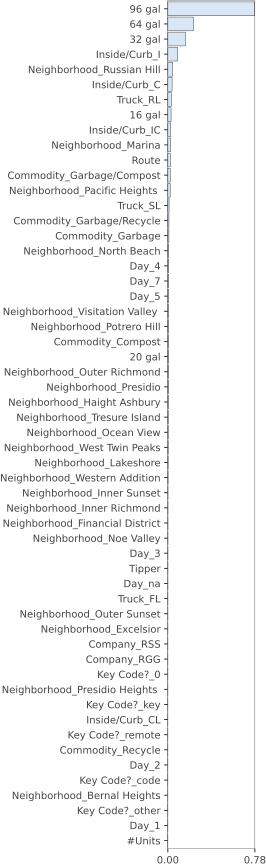

In [ ]:
from rfpimp import *
I = importances(lm, X_train, y_train)
plot_importances(I)

In [ ]:
I.sort_values(['Importance'],ascending=False)

,Importance
Feature,
96 gal,0.779343
64 gal,0.229624
32 gal,0.157009
Inside/Curb_I,0.087938
Neighborhood_Russian Hill,0.043699
Inside/Curb_C,0.038088
Truck_RL,0.031806
16 gal,0.029020
Inside/Curb_IC,0.025869


In [ ]:
lm.coef_

array([ 2.17471094e+01,  1.71935006e+01,  2.03073030e+01,  2.35594477e+01,
        3.52473705e+01, -2.17951442e-02,  3.14908743e+00, -1.02603516e+00,
       -1.67895242e+01,  1.75079073e+01,  1.98888436e+01, -2.16477057e+01,
        1.04047893e+00, -2.47793812e+01, -8.14944982e+00,  4.03582130e+01,
        5.60069111e+01,  2.19724909e+00, -2.19724909e+00, -1.80264082e+00,
       -4.32385765e+00, -4.58222523e+00, -1.38857246e+01, -1.25148622e+01,
       -7.61508814e+01, -1.46534241e+01,  2.19724909e+00,  2.92537941e+00,
        7.03858945e+00, -3.55729796e+01, -1.92860179e+01, -3.77120188e+01,
        2.47416041e+01,  1.32418035e+01, -1.15200263e+01, -1.70851817e+01,
       -6.13342257e+00, -2.77490635e+01, -1.50048633e+01, -4.41960977e+01,
       -6.05937866e+01, -4.40518244e+01, -3.03520269e+01, -5.12850528e+01,
       -2.80537097e+01, -2.46840434e+01, -2.06831641e+01, -3.21485733e+01,
       -2.93167536e+01, -2.95099742e+01, -8.86607337e+00, -5.72051080e+01,
       -3.78328994e+01, -

In [ ]:
# How well does our model predict? 

y_pred = lm.predict(X_validation)
mse = mean_squared_error(y_validation, y_pred)
print(f"Mean squared error: {mse:,.2f}")

Mean squared error: 2,202.50


# With Regularization

In [ ]:
algorithms = [LinearRegression(), 
              Lasso(), 
              Ridge(), 
              HuberRegressor(), 
              SGDRegressor(),
              ARDRegression(),
              TweedieRegressor()]

for algo in algorithms:
    pipe = Pipeline([('scaler', StandardScaler()), 
                     ('lm',     algo)])

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_validation)
    mse = mean_squared_error(y_validation, y_pred)
    print(f"{algo.__class__.__name__:<17} - mean squared error: {mse:,.2f}, Accuracy {100*pipe.score(X_validation, y_validation):.0f}%")


LinearRegression  - mean squared error: 2,202.90, Accuracy 64%
Lasso             - mean squared error: 2,242.52, Accuracy 64%
Ridge             - mean squared error: 2,202.08, Accuracy 64%
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
HuberRegressor    - mean squared error: 2,295.79, Accuracy 63%
SGDRegressor      - mean squared error: 6,756,871,110.12, Accuracy -109139284%
ARDRegression     - mean squared error: 2,210.72, Accuracy 64%
TweedieRegressor  - mean squared error: 2,736.79, Accuracy 56%


# Tune hyperparameters - Ridge 

# Tune hyperparameters - Lasso
This method is more likely to zero out coefficients 

In [ ]:
pipe = Pipeline([('scaler', StandardScaler()), 
                     ('lasso', Lasso())])

pipe.fit(X_train, y_train)

pipe['lasso'].coef_

array([-0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  3.13344782e+00,
        2.19869753e+01,  0.00000000e+00,  0.00000000e+00,  3.32906877e+01,
       -0.00000000e+00, -0.00000000e+00,  9.47398083e-01, -2.91337361e+00,
        0.00000000e+00, -1.65029028e+01, -9.49007109e-02,  1.33904034e+01,
        6.85556113e+00,  3.02825347e+00, -3.54578831e-16,  1.73108257e+00,
        6.95421071e-01,  0.00000000e+00, -1.83668764e+00, -9.25725098e-02,
       -2.31387741e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -6.98938214e-01,
        3.24949853e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        2.59809402e+00, -0.00000000e+00,  4.99031336e-01, -8.09618440e-02,
       -9.31588230e-01, -2.22087112e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -3.45586718e-01,  0.00000000e+00, -3.48835113e+00,
       -2.28558816e+00, -

In [ ]:
pipe['lasso'].intercept_

93.0059649122807

# Test our Model versus Regan's

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=938c6ad9-491d-4307-bf8a-c751a244ce4f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>